### Load Imports

In [ ]:
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


## Load Dataset


In [ ]:
path = kagglehub.dataset_download("ulrikthygepedersen/fastfood-nutrition")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, "fastfood.csv"))

Using Colab cache for faster access to the 'fastfood-nutrition' dataset.
Path to dataset files: /kaggle/input/fastfood-nutrition


## Inspect Data



In [ ]:
df.head(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [ ]:
df.restaurant.value_counts()

,count
restaurant,
Taco Bell,115
Subway,96
Burger King,70
Mcdonalds,57
Arbys,55
Sonic,53
Dairy Queen,42
Chick Fil-A,27


## Data Pre-Processing


#### Handle Missing Values


In [ ]:
df.isnull().sum()

,0
restaurant,0
item,0
calories,0
cal_fat,0
total_fat,0
sat_fat,0
trans_fat,0
cholesterol,0
sodium,0
total_carb,0


In [ ]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

if duplicate_rows > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated()])
else:
    print("No duplicate rows found.")

Number of duplicate rows: 2

Duplicate rows:


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
492,Taco Bell,Chili Cheese Burrito,380,150,17,8.0,1.0,35,930,41,5.0,2,16.0,NaN,NaN,NaN,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other


In [ ]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


#### Drop Columns for missing inputs and not needed



In [ ]:
df.drop(columns=['vit_a','vit_c','calcium','salad','cal_fat'],axis=1,inplace=True)

df.fiber.fillna(df.fiber.mean(),inplace=True)
df.protein.fillna(df.protein.mean(),inplace=True)

/tmp/ipython-input-4147284748.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fiber.fillna(df.fiber.mean(),inplace=True)
/tmp/ipython-input-4147284748.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

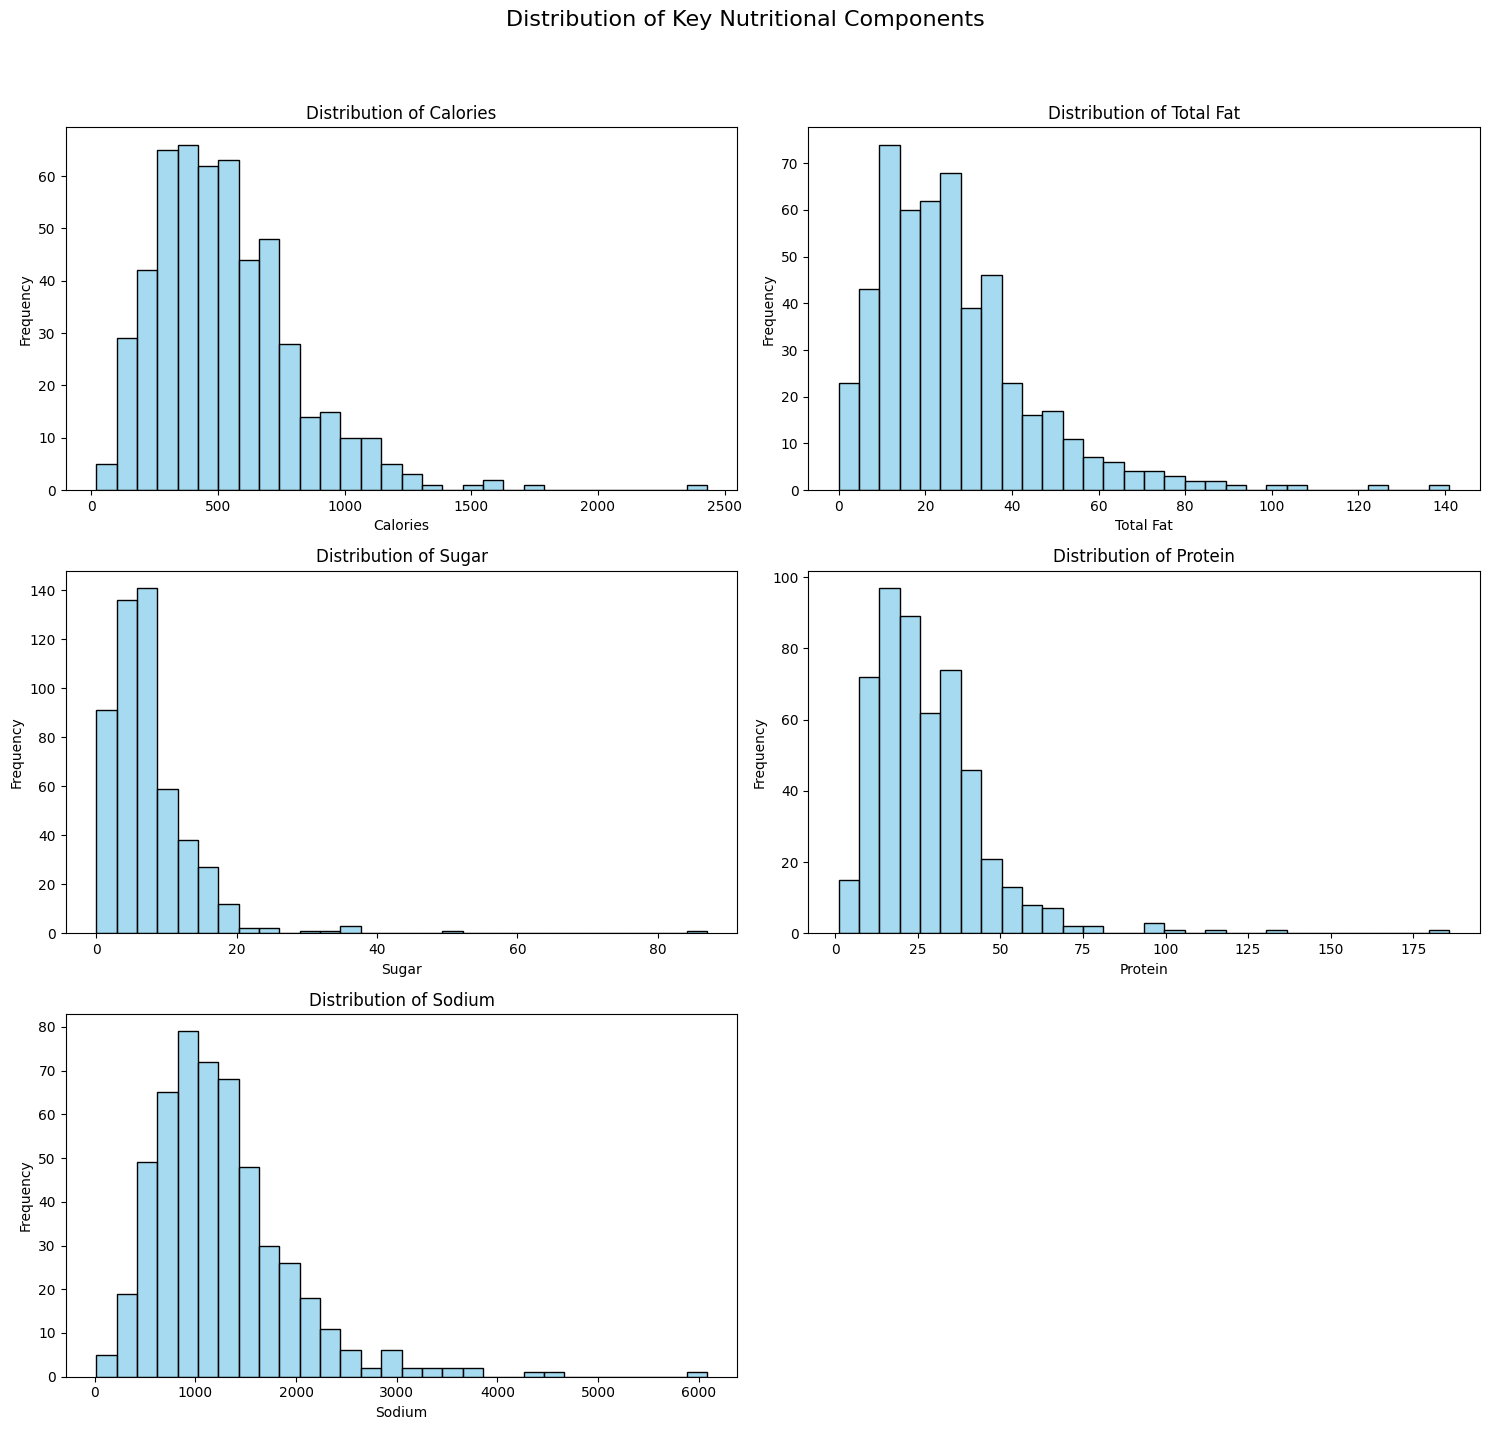

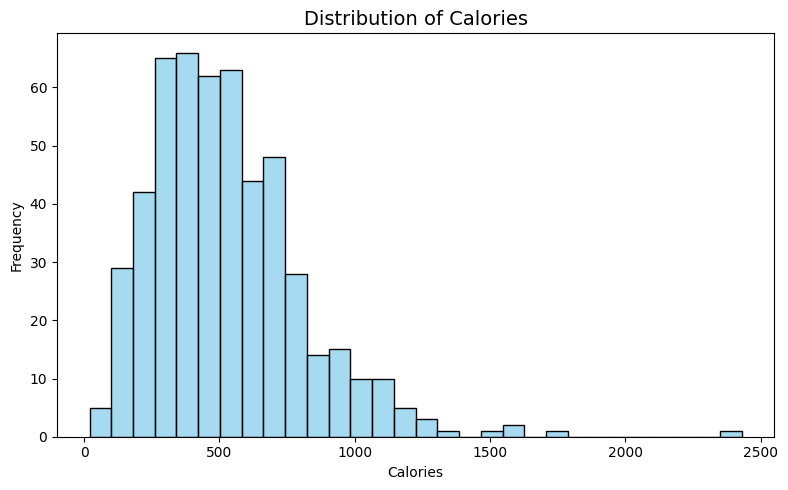

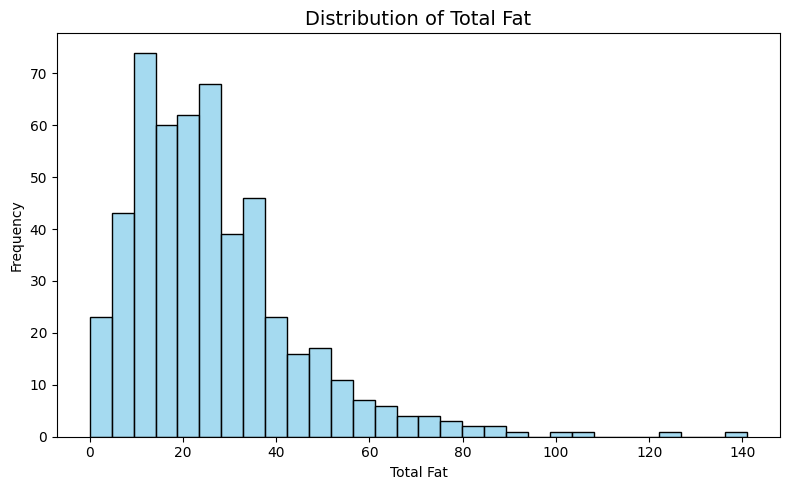

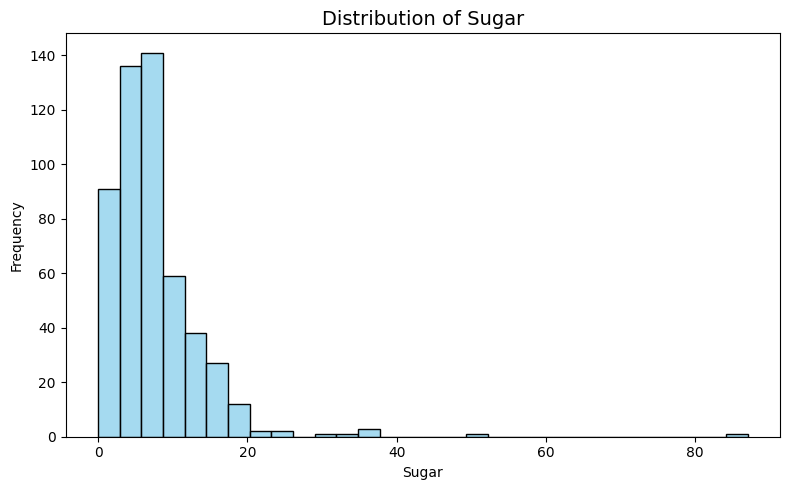

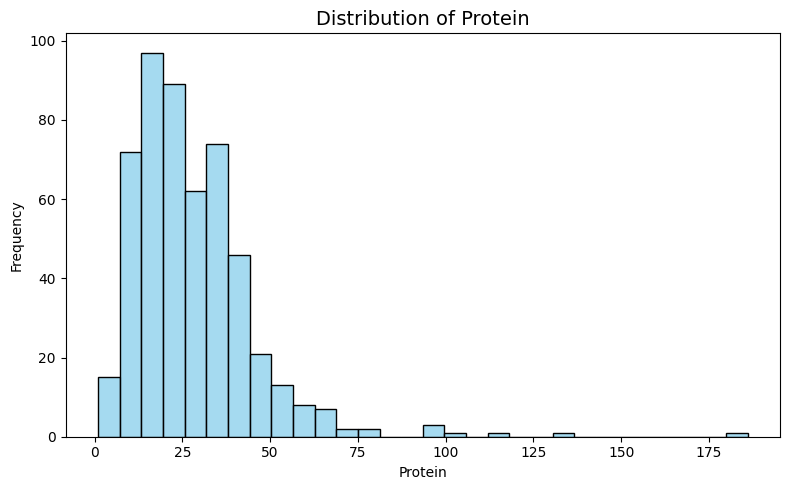

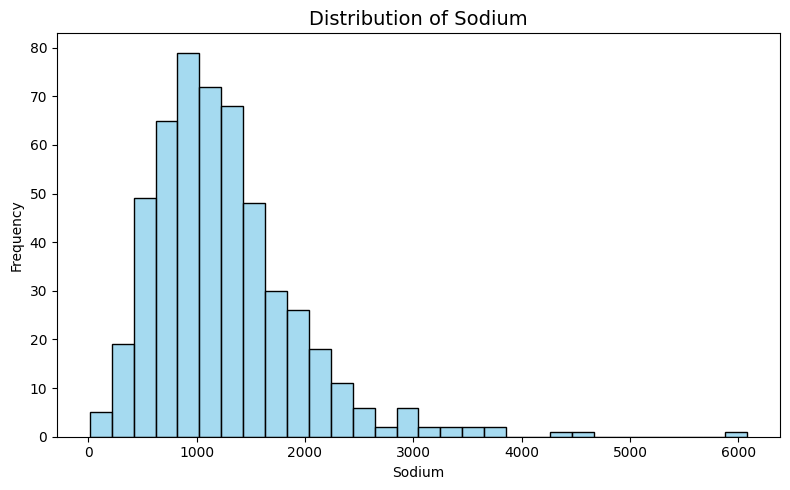

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Key Nutritional Components', fontsize=16)

nutritional_components = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']
axes = axes.flatten()

for i, col in enumerate(nutritional_components):
    if i < len(axes):
        sns.histplot(df[col], kde=False, bins=30, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
        axes[i].set_xlabel(col.replace("_", " ").title())
        axes[i].set_ylabel('Frequency')

for j in range(len(nutritional_components), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('nutritional_components_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

for i, col in enumerate(nutritional_components):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'{col}_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
nutritional_components = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']

for col in nutritional_components:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=False, bins=30, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Save the plot as a PNG file
    filename = f'distribution_of_{col}.png'
    plt.savefig(filename)
    plt.close() # Close the plot to free up memory

    print(f"Plot for {col.replace("_", " ").title()} saved as {filename}")

Plot for Calories saved as distribution_of_calories.png
Plot for Total Fat saved as distribution_of_total_fat.png
Plot for Sugar saved as distribution_of_sugar.png
Plot for Protein saved as distribution_of_protein.png
Plot for Sodium saved as distribution_of_sodium.png


In [ ]:
df.head()

,restaurant,item,calories,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7,2.0,0.0,95,1110,44,3.0,11,37.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45,17.0,1.5,130,1580,62,2.0,18,46.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,67,27.0,3.0,220,1920,63,3.0,18,70.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31,10.0,0.5,155,1940,62,2.0,18,55.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45,12.0,0.5,120,1980,81,4.0,18,46.0


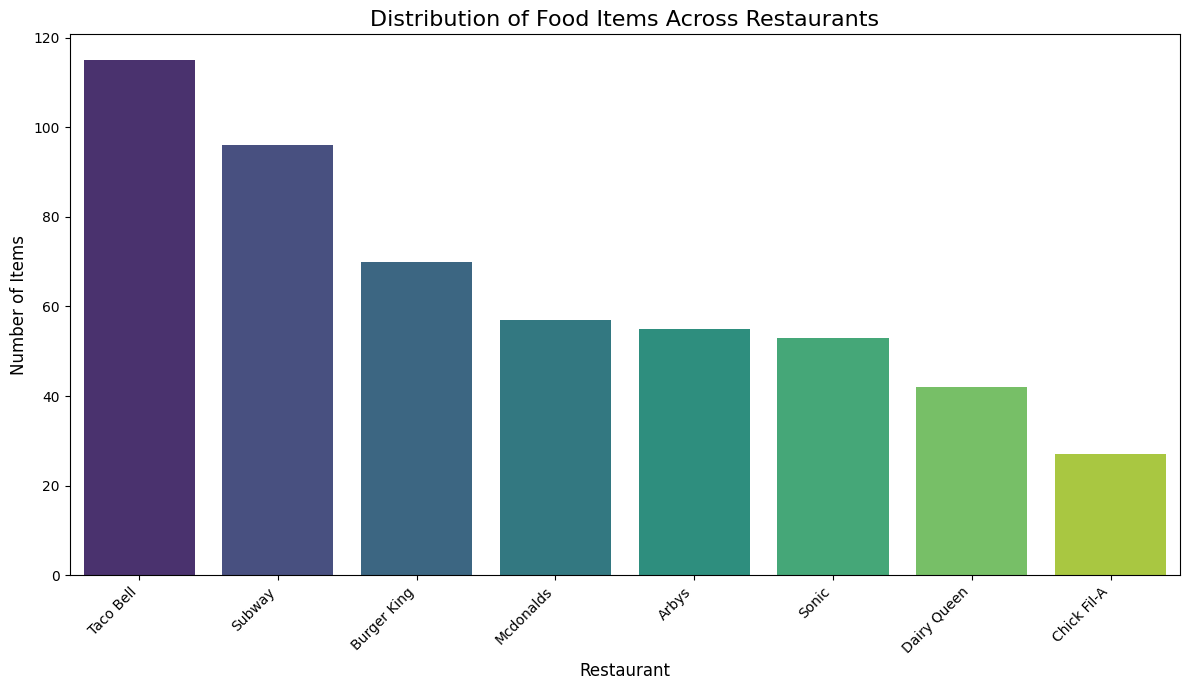

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

restaurant_counts = df['restaurant'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, hue=restaurant_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Food Items Across Restaurants', fontsize=16)
plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.savefig('restaurant_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



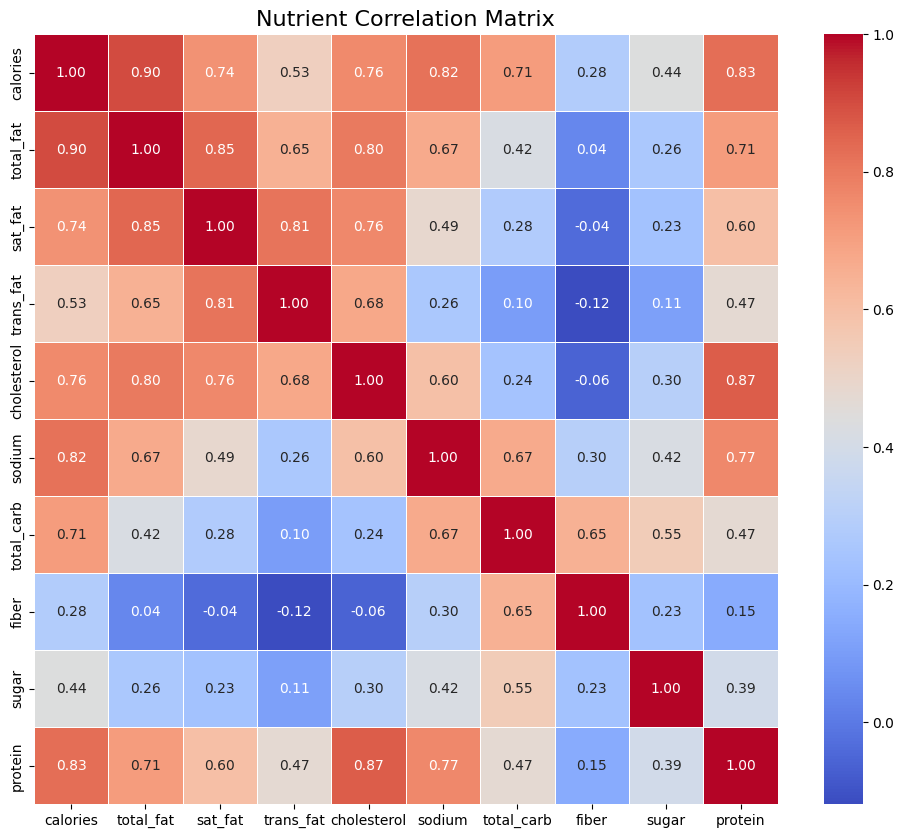

In [ ]:
plt.figure(figsize=(12, 10))

# Calculate correlation matrix
corr = df.drop(columns=['restaurant', 'item']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Nutrient Correlation Matrix', fontsize=16)

# Save the heatmap
plt.savefig('nutrient_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

#### Final Features

In [ ]:
df.drop(columns=['sat_fat', 'trans_fat', 'cholesterol', 'total_carb'],axis=1,inplace=True)

#### Export

In [ ]:
from google.colab import files

output_filename = 'processed_fastfood.csv'
df.to_csv(output_filename, index=False)

print(f"Processed data saved to {output_filename}")
files.download(output_filename)

Processed data saved to processed_fastfood.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>